In [1]:
from scipy import stats
import numpy as np
from pyvbmc import  VBMC
import pickle
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from ex23_utils import *

# Prior type:
v near to middle, a close to low bound, w in middle

width = v: 10, a: 10 , w = 0.8

In [ ]:
v = 2; a = 2
sim_data_to_files(v,a)
prior_bounds = { 'v_low': -5, 'v_high': 5, 'a_low': 0.01, 'a_high': 10, 'w_low': 0.1, 'w_high': 0.9 }
save_prior_bounds(prior_bounds)

lb = np.array([-5, 0.01, 0.1]); ub = np.array([5, 10, 0.9])
plb = np.array([-4,0.1,0.15]); pub = np.array([4,7,0.85])

x0 = np.array([np.random.uniform(plb[0], pub[0]), np.random.uniform(plb[1], pub[1]), np.random.uniform(plb[2], pub[2])])
vp, results = run_vbmc(x0, lb, ub, plb, pub)

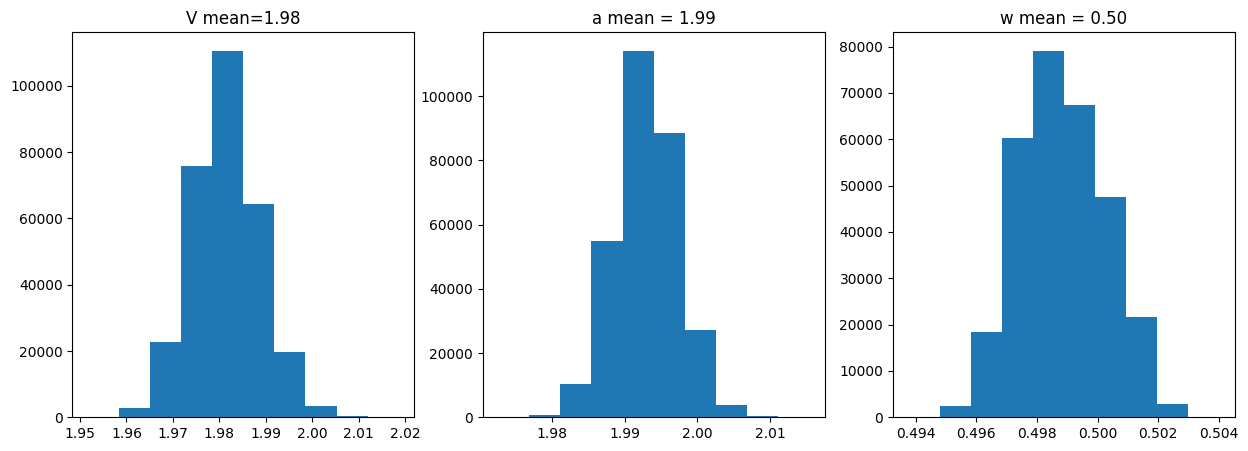

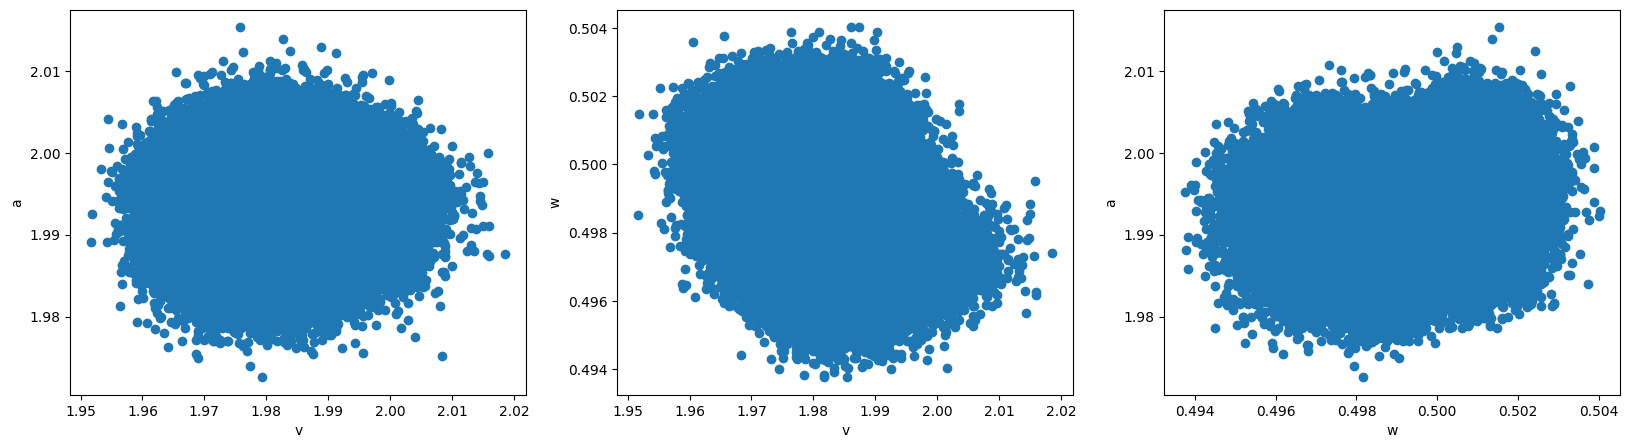

In [3]:
vbmc_plots(vp)

# Another prior type:
v near to middle, a in middle bound, w in middle

widths = v: 10, a = 20, w = 0.8

In [ ]:
v = 0; a = 10
sim_data_to_files(v,a)
prior_bounds = { 'v_low': -5, 'v_high': 5, 'a_low': 0.01, 'a_high': 20, 'w_low': 0.1, 'w_high': 0.9 }
save_prior_bounds(prior_bounds)

lb = np.array([-5, 0.01, 0.1]); ub = np.array([5, 20, 0.9])
plb = np.array([-4, 5, 0.15]); pub = np.array([4, 15, 0.85])

x0 = np.array([np.random.uniform(plb[0], pub[0]), np.random.uniform(plb[1], pub[1]), np.random.uniform(plb[2], pub[2])])
vp, results = run_vbmc(x0, lb, ub, plb, pub)

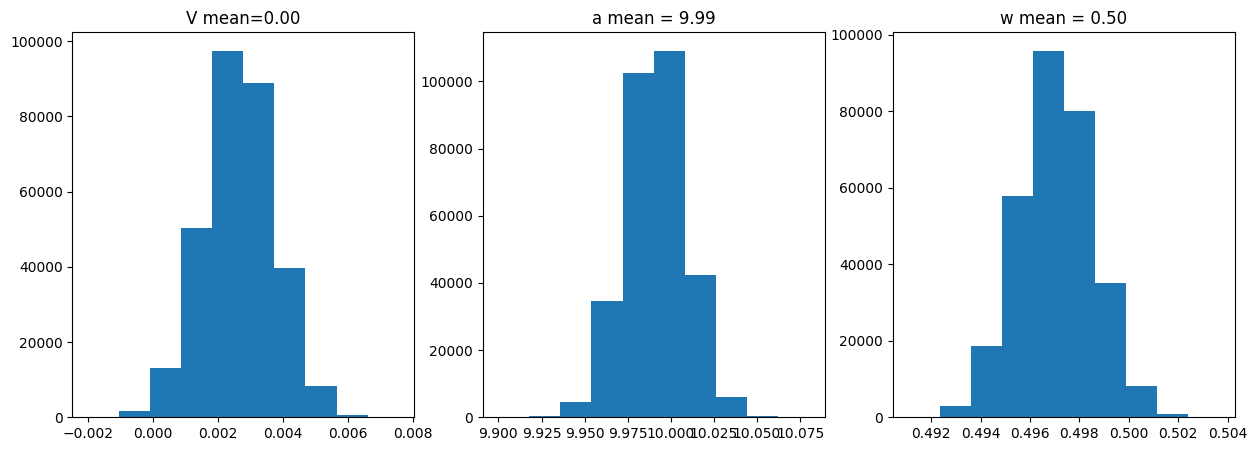

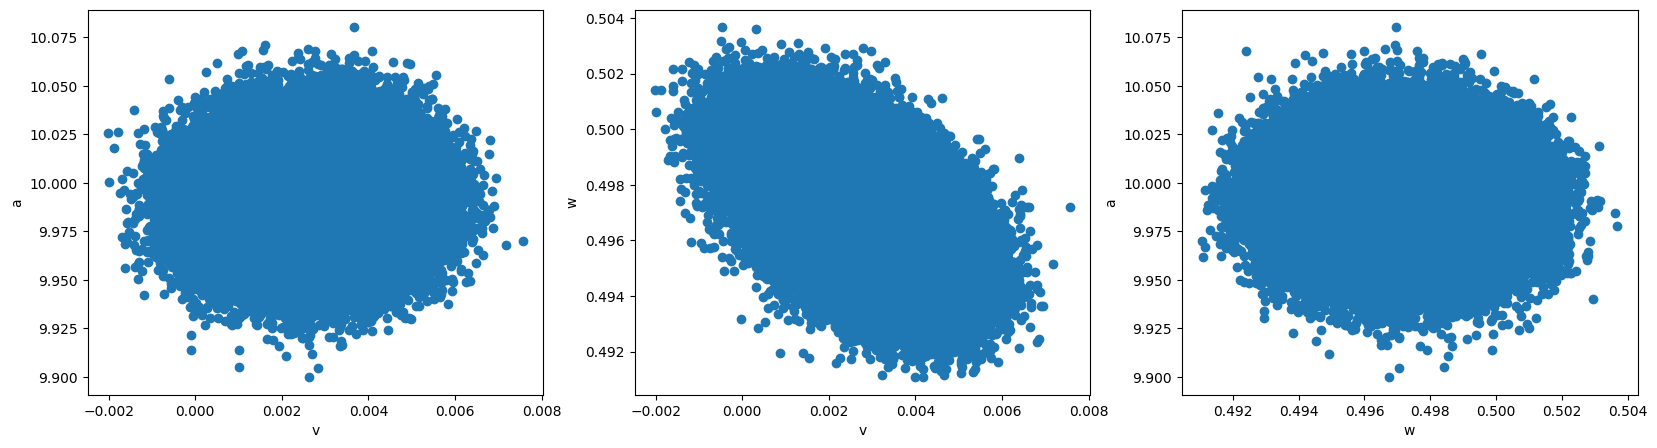

In [5]:
vbmc_plots(vp)

## Effect of priors:

1. Width: larger width takes more time but accuracy still good
2. closer or farther from extremes: This should NOT matter because its a uniform distribution. Five(5) from interval of [0,10] has same prob as from interval of [3,13](picking uniformly distribution). And accuracy is good in above results

# Effect of N

negative velocities less prior

In [2]:
v = -2; a = 2

# giving negative numbers less priors
prior_bounds = { 'v_low': -3, 'v_high': 10, 'a_low': 0.01, 'a_high': 10, 'w_low': 0.1, 'w_high': 0.9 }
save_prior_bounds(prior_bounds)

lb = np.array([-3, 0.01, 0.1]); ub = np.array([10, 10, 0.9])
plb = np.array([-2.5, 0.1, 0.15]); pub = np.array([5, 5, 0.85])

N_sample_sizes = [100, 500, 1000, 2500, 5000, 10000, 25000, 35000, 50000]

vbmc_results = {}
for n in N_sample_sizes:
    print(f"Processing {n}")
    sim_data_to_files_N(v,a,n)
    x0 = np.array([np.random.uniform(plb[0], pub[0]), np.random.uniform(plb[1], pub[1]), np.random.uniform(plb[2], pub[2])])
    vbmc_results[n], _ = run_vbmc(x0, lb, ub, plb, pub)

Processing 100
Reshaping x0 to row vector.
Reshaping lower bounds to (1, 3).
Reshaping upper bounds to (1, 3).
Reshaping plausible lower bounds to (1, 3).
Reshaping plausible upper bounds to (1, 3).
Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -17.538 +/-0.001.
Processing 500
Reshaping x0 to row vector.
Reshaping lower bounds to (1, 3).
Reshaping upper bounds to (1, 3).
Reshaping plausible lower bounds to (1, 3).
Reshaping plausible upper bounds to (1, 3).


/home/rka/.local/lib/python3.10/site-packages/cma/evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar subtract
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),
/home/rka/.local/lib/python3.10/site-packages/cma/evolution_strategy.py:3829: RuntimeWarning: invalid value encountered in scalar multiply
  current_fitness_range < opts['tolfunrel'] * (es.fit.median0 - es.fit.median_min),
/home/rka/.local/lib/python3.10/site-packages/cma/evolution_strategy.py:3823: RuntimeWarning: invalid value encountered in scalar subtract
  current_fitness_range = max(es.fit.fit) - min(es.fit.fit)


Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -59.939 +/-0.001.
Processing 1000
Reshaping x0 to row vector.
Reshaping lower bounds to (1, 3).
Reshaping upper bounds to (1, 3).
Reshaping plausible lower bounds to (1, 3).
Reshaping plausible upper bounds to (1, 3).
Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -78.726 +/-0.001.
Processing 2500
Reshaping x0 to row vector.
Reshaping lower bounds to (1, 3).
Reshaping upper bounds to (1, 3).
Reshaping plausible lower bounds to (1, 3).
Reshaping plausible upper bounds to (1, 3).
Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -201.201 +/-0.001.
Processing 5000
Reshaping x0 to row vector.
Reshaping lower bounds to (1, 3).
Reshaping upper bounds to (1, 3).
Reshaping plausible lower bounds to (1, 3).
Reshaping plausible upper bounds to (1, 3).


/home/rka/.local/lib/python3.10/site-packages/pyvbmc/vbmc/active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 0. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
/home/rka/.local/lib/python3.10/site-packages/pyvbmc/vbmc/active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 4. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
/home/rka/.local/lib/python3.10/site-packages/pyvbmc/vbmc/active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 6. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
/home/rka/.local/lib/python3.10/site-packages/pyvbmc/vbmc/active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 1. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
/home/rka/.local/lib/python3.10/site-packages/pyvbmc/vbmc/active_sample.py:584: UserWarn

Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -509.566 +/-0.001.
Processing 10000
Reshaping x0 to row vector.
Reshaping lower bounds to (1, 3).
Reshaping upper bounds to (1, 3).
Reshaping plausible lower bounds to (1, 3).
Reshaping plausible upper bounds to (1, 3).


/home/rka/.local/lib/python3.10/site-packages/cma/evolution_strategy.py:3824: RuntimeWarning: invalid value encountered in scalar subtract
  historic_fitness_range = max(es.fit.hist) - min(es.fit.hist)


Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -958.739 +/-0.001.
Processing 25000
Reshaping x0 to row vector.
Reshaping lower bounds to (1, 3).
Reshaping upper bounds to (1, 3).
Reshaping plausible lower bounds to (1, 3).
Reshaping plausible upper bounds to (1, 3).
Inference terminated: variational solution stable for options.tol_stable_count fcn evaluations.
Estimated ELBO: -2319.247 +/-0.001.
Processing 35000
Reshaping x0 to row vector.
Reshaping lower bounds to (1, 3).
Reshaping upper bounds to (1, 3).
Reshaping plausible lower bounds to (1, 3).
Reshaping plausible upper bounds to (1, 3).
Inference terminated: reached maximum number of function evaluations options.max_fun_evals.
Estimated ELBO: -3782.972 +/-0.000.
Caution: Returned variational solution may have not converged.
Processing 50000
Reshaping x0 to row vector.
Reshaping lower bounds to (1, 3).
Reshaping upper bounds to (1, 3).
Reshaping plausible lower bound

In [5]:
vaw_means = np.zeros((len(N_sample_sizes), 3))
vaw_median = np.zeros((len(N_sample_sizes), 3))
vaw_means_std_err = np.zeros((len(N_sample_sizes), 3))
vaw_median_mad = np.zeros((len(N_sample_sizes), 3))

for i,n in enumerate(N_sample_sizes):
    vp =  vbmc_results[n]
    v_a_w, _ = vp.sample(int(3e5))
    for p  in range(3):
        vaw_means[i, p] = np.mean(v_a_w[:,p])
        vaw_means_std_err[i, p] = np.std(v_a_w[:,p]) / np.sqrt(len(v_a_w[:,p]))
        vaw_median[i, p] = np.median(v_a_w[:,p])
        vaw_median_mad[i, p] = np.median(np.abs(v_a_w[:,p] - vaw_median[i, p]))

In [18]:
with open('vaw_stats.pkl', 'wb') as f:
    pickle.dump({'vaw_means': vaw_means, 
                 'vaw_means_errs': vaw_means_std_err,
                 'vaw_medians': vaw_median,
                 'vaw_mads': vaw_median_mad}, f)


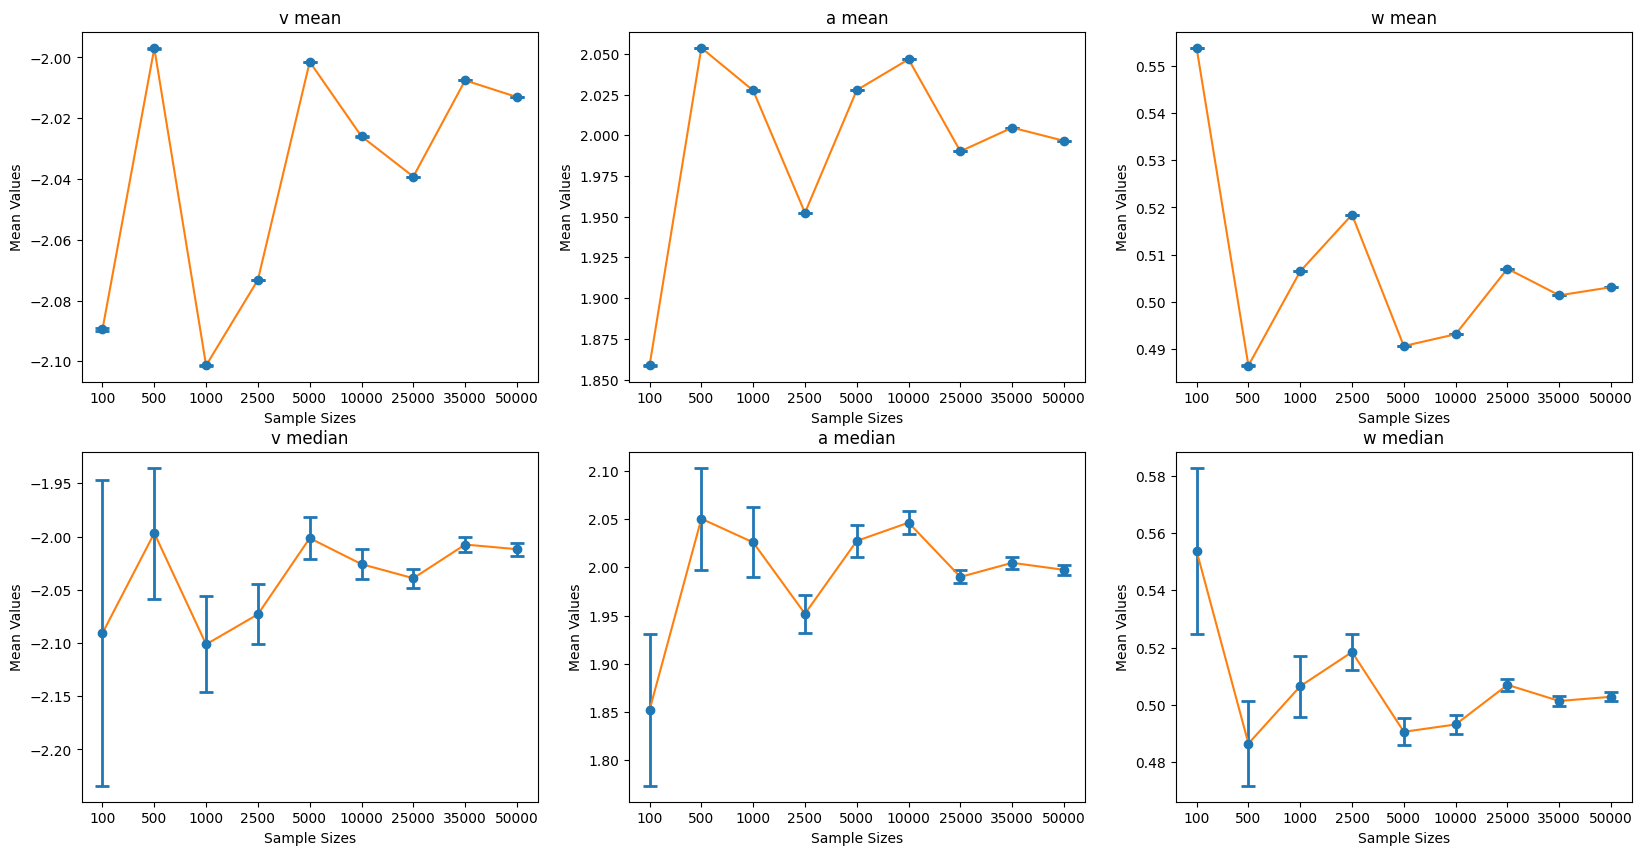

In [17]:
sample_size_labels = [str(size) for size in N_sample_sizes]
# Create the plot
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
plt.errorbar(sample_size_labels, vaw_means[:,0], yerr=vaw_means_std_err[:,0], fmt='o', capsize=5, capthick=2, elinewidth=2)
plt.plot(sample_size_labels, vaw_means[:,0]);
plt.xlabel('Sample Sizes')
plt.ylabel('Mean Values')
plt.title('v mean')

plt.subplot(2,3,2)
plt.errorbar(sample_size_labels, vaw_means[:,1], yerr=vaw_means_std_err[:,1], fmt='o', capsize=5, capthick=2, elinewidth=2)
plt.plot(sample_size_labels, vaw_means[:,1]);
plt.xlabel('Sample Sizes')
plt.ylabel('Mean Values')
plt.title('a mean')


plt.subplot(2,3,3)
plt.errorbar(sample_size_labels, vaw_means[:,2], yerr=vaw_means_std_err[:,2], fmt='o', capsize=5, capthick=2, elinewidth=2)
plt.plot(sample_size_labels, vaw_means[:,2]);
plt.xlabel('Sample Sizes')
plt.ylabel('Mean Values')
plt.title('w mean')


plt.subplot(2,3,4)
plt.errorbar(sample_size_labels, vaw_median[:,0], yerr=vaw_median_mad[:,0], fmt='o', capsize=5, capthick=2, elinewidth=2)
plt.plot(sample_size_labels, vaw_median[:,0]);
plt.xlabel('Sample Sizes')
plt.ylabel('Mean Values')
plt.title('v median')

plt.subplot(2,3,5)
plt.errorbar(sample_size_labels, vaw_median[:,1], yerr=vaw_median_mad[:,1], fmt='o', capsize=5, capthick=2, elinewidth=2)
plt.plot(sample_size_labels, vaw_median[:,1]);
plt.xlabel('Sample Sizes')
plt.ylabel('Mean Values')
plt.title('a median')


plt.subplot(2,3,6)
plt.errorbar(sample_size_labels, vaw_median[:,2], yerr=vaw_median_mad[:,2], fmt='o', capsize=5, capthick=2, elinewidth=2)
plt.plot(sample_size_labels, vaw_median[:,2]);
plt.xlabel('Sample Sizes')
plt.ylabel('Mean Values')
plt.title('w median')

# Show the plot
plt.show()

In [7]:
vaw_means = np.zeros((len(N_sample_sizes), 3))
vaw_median = np.zeros((len(N_sample_sizes), 3))

for i,n in enumerate(N_sample_sizes):
    vp =  vbmc_results[n]
    v_a_w, _ = vp.sample(int(3e5))
    for p  in range(3):
        vaw_means[i, p] = np.mean(v_a_w[:,p])
        vaw_median[i, p] = np.median(v_a_w[:,p])

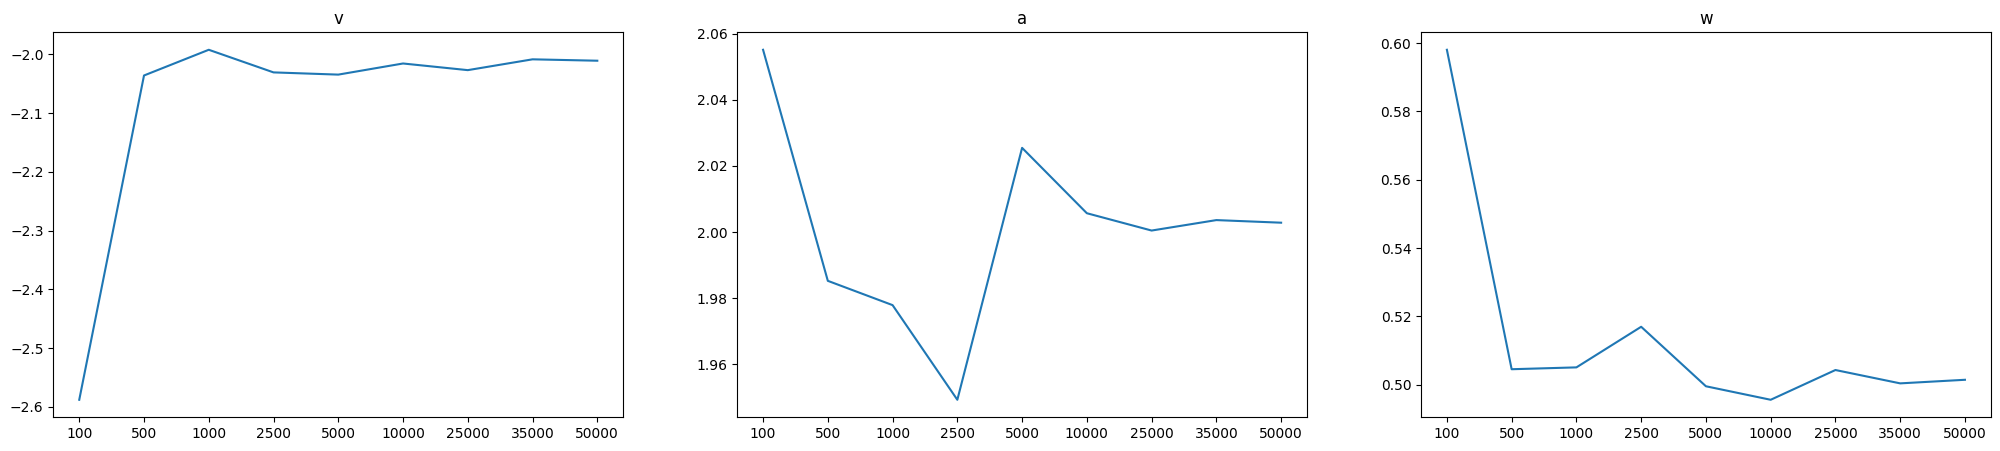

In [15]:
sample_size_labels = [str(size) for size in N_sample_sizes]
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1)
plt.plot(vaw_means[:,0]); plt.xticks(range(len(sample_size_labels)), sample_size_labels); plt.title('v');
plt.subplot(1, 3, 2)
plt.plot(vaw_means[:,1]); plt.xticks(range(len(sample_size_labels)), sample_size_labels); plt.title('a');
plt.subplot(1, 3,3)
plt.plot(vaw_means[:,2]); plt.xticks(range(len(sample_size_labels)), sample_size_labels); plt.title('w');


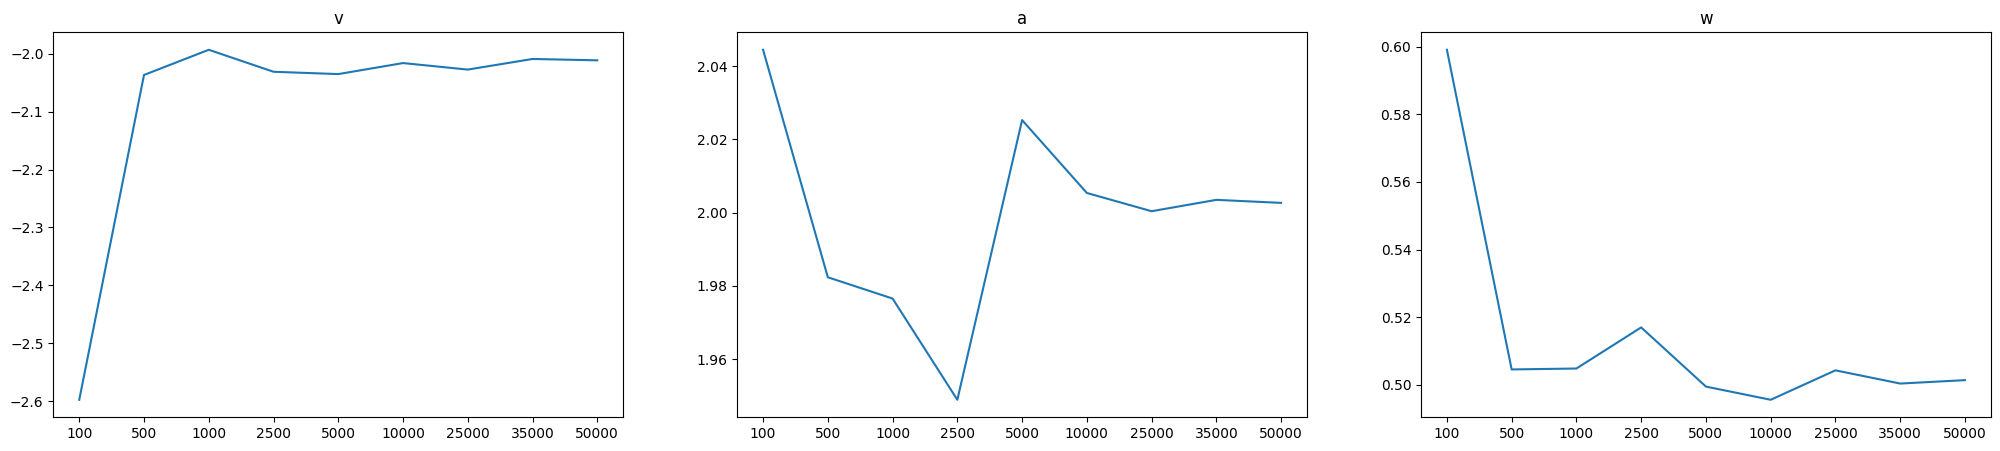

In [17]:
sample_size_labels = [str(size) for size in N_sample_sizes]
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1)
plt.plot(vaw_median[:,0]); plt.xticks(range(len(sample_size_labels)), sample_size_labels); plt.title('v');
plt.subplot(1, 3, 2)
plt.plot(vaw_median[:,1]); plt.xticks(range(len(sample_size_labels)), sample_size_labels); plt.title('a');
plt.subplot(1, 3,3)
plt.plot(vaw_median[:,2]); plt.xticks(range(len(sample_size_labels)), sample_size_labels); plt.title('w');

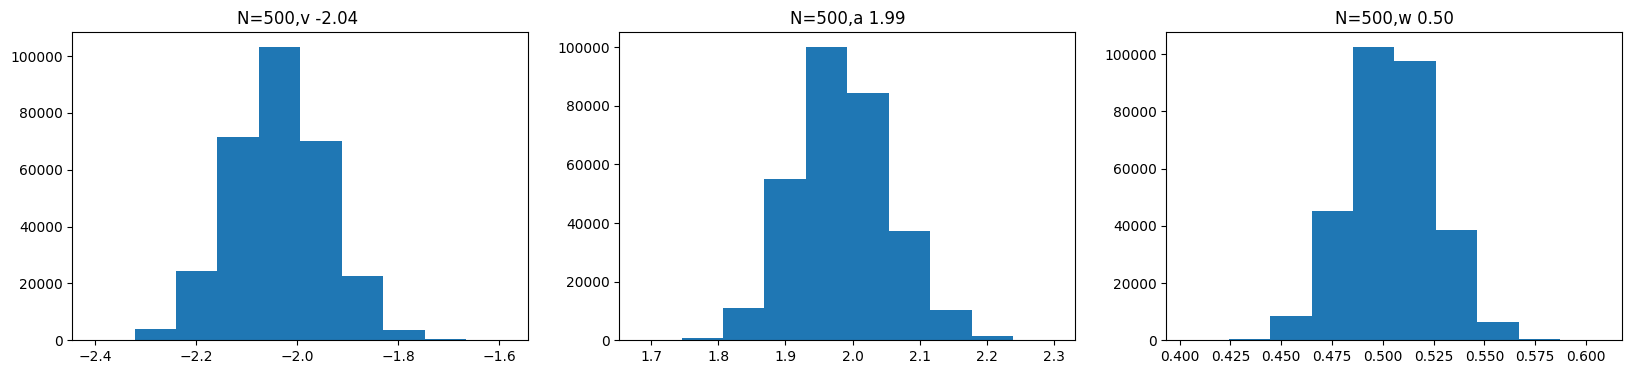

In [34]:
vp =  vbmc_results[500]
v_a_w, _ = vp.sample(int(3e5))
[]
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.hist(v_a_w[:,0]);plt.title(f'N=500,v {np.mean(v_a_w[:,0]):.2f} ');
plt.subplot(1,3,2)
plt.hist(v_a_w[:,1]);plt.title(f'N=500,a {np.mean(v_a_w[:,1]):.2f}');
plt.subplot(1,3,3)
plt.hist(v_a_w[:,2]);plt.title(f'N=500,w {np.mean(v_a_w[:,2]):.2f}');


## N = 500 would just suffice to 